<a href="https://colab.research.google.com/github/fsconrado/MScript2/blob/main/Algoritmo_Mestrado_Conrado_DefinitivoV2(OnlyBiomarcadores).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Cenário 1:**{ Somente os Biomarcadores | Dados Não balanceados}
---

# **Visão dos Dados

In [871]:
#1. IMPORTAR O DATASET (COLUNAS IMPORTANTES: AGE, SEX, LYVE1, REG1B, TFF1 ==> ALVO PREVER A COLUNA STAGE.3)
#!pip install plotly --upgrade
#Baixar os dados e jogar na variável DADOS
import pandas as pd

dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")
dados = dados.fillna(1, inplace= False)
# 16 colunas


In [872]:
dados

,sample_id,patient_cohort,sample_origin,diagnosis,stage,sex,age,LYVE1,REG1B,TFF1,creatinine,plasma_CA19_9,REG1A,stage2
0,S497,Cohort1,ESP,3,I,F,81,12.017150,431.422530,874.099700,0.56550,1.0,1.000,I
1,S456,Cohort1,LIV,3,IA,M,57,2.628425,40.620818,529.984000,1.73043,10.0,155.270,I
2,S520,Cohort1,BPTB,3,IA,M,55,2.830541,33.406150,323.175770,0.47502,11.0,210.185,I
3,S573,Cohort2,BPTB,3,IA,M,58,0.632433,188.253000,138.630000,0.44109,11.0,1.000,I
4,S401,Cohort1,LIV,3,IB,M,73,12.245820,196.921830,1529.183124,0.70122,3236.0,432.917,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,S549,Cohort2,BPTB,3,IV,M,68,7.058209,156.241000,525.178000,0.52026,1.0,1.000,IV
195,S558,Cohort2,BPTB,3,IV,F,71,8.341207,16.915000,245.947000,0.85956,1.0,1.000,IV
196,S560,Cohort2,BPTB,3,IV,M,63,7.674707,289.701000,537.286000,1.36851,1.0,1.000,IV
197,S583,Cohort2,BPTB,3,IV,F,75,8.206777,205.930000,722.523000,1.33458,1.0,1.000,IV


In [873]:
#Avaliar o número de amostras para cada classe(estadiamento)
import numpy as np
np.unique(dados['stage2'], return_counts = True)

(array(['I', 'II', 'III', 'IV'], dtype=object), array([16, 86, 76, 21]))

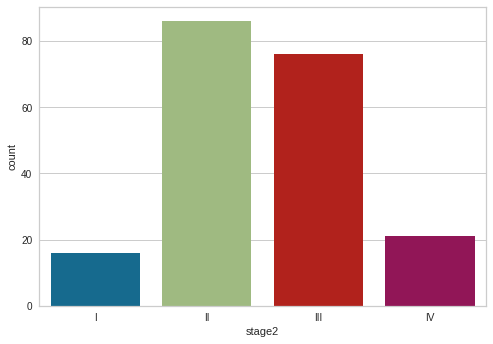

In [874]:
#Gerar um gráfico para avaliar visualmente o número de amostras para cada classe, objetivo é avaliar se os dados estão balanceados.
import seaborn as sns
sns.countplot(x = dados['stage2']);

# **C1-01. KnnClassifier**{*Unbalanced*} => 0.35

In [875]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | LYVE1	REG1B	TFF1
X_dados = dados.iloc[:,7:13].values
X_dados

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

#label_encoder_sex = LabelEncoder()
#X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
#X_dados

#Onehot
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

#onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
#X_dados = onehotencorder.fit_transform(X_dados)
#X_dados

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler() #(with_mean=False)
X_dados = scaler_dados.fit_transform(X_dados)


#Separação dos dados SEM o balanceamento
from sklearn.model_selection import train_test_split

X_dados_train , X_dados_test, y_dados_train, y_dados_test = train_test_split(X_dados, y_dados, test_size=0.2, random_state=0)
X_dados_train.shape, X_dados_test.shape


((159, 6), (40, 6))

In [876]:
#KNN CLASSIFICADOR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [877]:
#knn_modelc = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p = 2)
knn_modelc = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

knn_modelc.fit(X_dados_train, y_dados_train)

KNeighborsClassifier()

In [878]:
previsoes = knn_modelc.predict(X_dados_test)
previsoes

array(['II', 'II', 'II', 'III', 'II', 'II', 'II', 'III', 'I', 'II', 'III',
       'II', 'II', 'III', 'II', 'I', 'II', 'II', 'III', 'III', 'I', 'II',
       'II', 'II', 'II', 'III', 'II', 'II', 'II', 'III', 'II', 'II',
       'III', 'II', 'III', 'II', 'II', 'II', 'III', 'II'], dtype=object)

In [879]:
y_dados_test

array(['II', 'III', 'III', 'II', 'III', 'IV', 'I', 'III', 'I', 'III',
       'II', 'III', 'III', 'III', 'II', 'I', 'II', 'III', 'II', 'II',
       'III', 'III', 'II', 'III', 'II', 'III', 'IV', 'IV', 'II', 'II',
       'II', 'II', 'II', 'III', 'II', 'IV', 'III', 'I', 'III', 'IV'],
      dtype=object)

In [880]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_dados_test, previsoes) # padronização

0.35

0.35

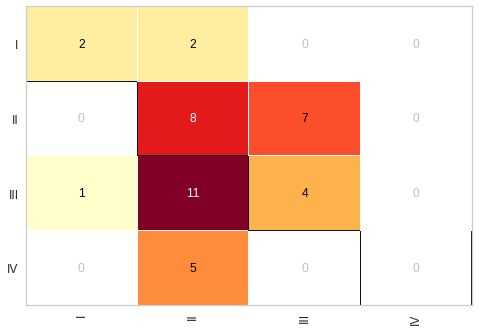

In [881]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_modelc)
cm.fit(X_dados_train, y_dados_train)
cm.score(X_dados_test, y_dados_test)

In [882]:
print(classification_report(y_dados_test, previsoes))

              precision    recall  f1-score   support

           I       0.67      0.50      0.57         4
          II       0.31      0.53      0.39        15
         III       0.36      0.25      0.30        16
          IV       0.00      0.00      0.00         5

    accuracy                           0.35        40
   macro avg       0.33      0.32      0.31        40
weighted avg       0.33      0.35      0.32        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **C1-02. RandomForestClassifier**{*Unbalanced*} => 0.475

In [883]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,7:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

#label_encoder_sex = LabelEncoder()
#X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
#X_dados

#Onehot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
#X_dados = onehotencorder.fit_transform(X_dados)
#X_dados

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler() #(with_mean=False)
X_dados = scaler_dados.fit_transform(X_dados)



#Separação dos dados SEM o balanceamento
from sklearn.model_selection import train_test_split

X_dados_train , X_dados_test, y_dados_train, y_dados_test = train_test_split(X_dados, y_dados, test_size=0.2, random_state=0)
X_dados_train.shape, X_dados_test.shape
X_random_forest_dados_sb_teste = X_dados_test
y_random_forest_dados_sb_teste = y_dados_test

In [884]:
#RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
random_forest_dados_sb = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 200, random_state=0)
random_forest_dados_sb.fit(X_dados_train, y_dados_train)


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200, random_state=0)

In [885]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_dados_sb.predict(X_dados_test)
accuracy_score(y_dados_test, previsoes)

0.475

0.475

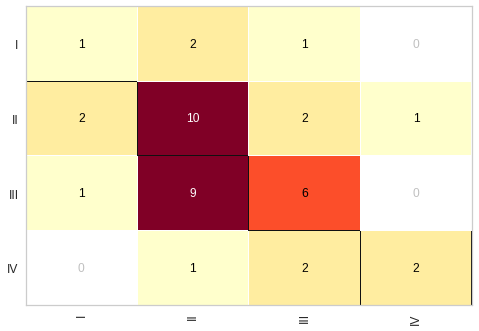

In [886]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_dados_sb)
cm.fit(X_dados_train, y_dados_train)
cm.score(X_dados_test, y_dados_test)

In [887]:
print(classification_report(y_dados_test, previsoes))

              precision    recall  f1-score   support

           I       0.25      0.25      0.25         4
          II       0.45      0.67      0.54        15
         III       0.55      0.38      0.44        16
          IV       0.67      0.40      0.50         5

    accuracy                           0.48        40
   macro avg       0.48      0.42      0.43        40
weighted avg       0.50      0.47      0.47        40



# **C1-03. SVM**{Unbalanced} => *0.55*, liner, 1, 1

In [888]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,7:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

#label_encoder_sex = LabelEncoder()
#X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
#X_dados

#Onehot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
#X_dados = onehotencorder.fit_transform(X_dados)
#X_dados

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler() #(with_mean=False)
X_dados = scaler_dados.fit_transform(X_dados)


#Separação dos dados SEM o balanceamento
from sklearn.model_selection import train_test_split

X_dados_train , X_dados_test, y_dados_train, y_dados_test = train_test_split(X_dados, y_dados, test_size=0.2, random_state=5)
X_dados_train.shape, X_dados_test.shape


((159, 6), (40, 6))

In [889]:
from sklearn.svm import SVC


In [890]:
svm_dados = SVC(kernel='linear', random_state=1, C = 1.0) # 2 -> 4
svm_dados.fit(X_dados_train, y_dados_train)

SVC(kernel='linear', random_state=1)

In [891]:
previsoes = svm_dados.predict(X_dados_test)
previsoes

array(['II', 'II', 'II', 'II', 'III', 'III', 'II', 'II', 'III', 'II',
       'III', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'III', 'II', 'II',
       'II', 'III', 'III', 'II', 'II', 'II', 'III', 'II', 'II', 'II',
       'II', 'II', 'II', 'III', 'II', 'II', 'III', 'III', 'II'],
      dtype=object)

In [892]:
y_dados_test

array(['III', 'II', 'III', 'III', 'III', 'III', 'III', 'I', 'II', 'II',
       'IV', 'II', 'II', 'II', 'II', 'III', 'I', 'II', 'III', 'III', 'IV',
       'II', 'II', 'III', 'II', 'II', 'III', 'II', 'II', 'II', 'II',
       'III', 'II', 'III', 'II', 'II', 'IV', 'III', 'III', 'II'],
      dtype=object)

In [893]:
from sklearn.metrics import accuracy_score, classification_report 
#0.575, liner, 1, 1 | 0.425, poly, 1, 1 | #0.475, sigmoid, 1, 1 | 0.425, rbf, 1, 1
accuracy_score(y_dados_test, previsoes)

0.55

0.55

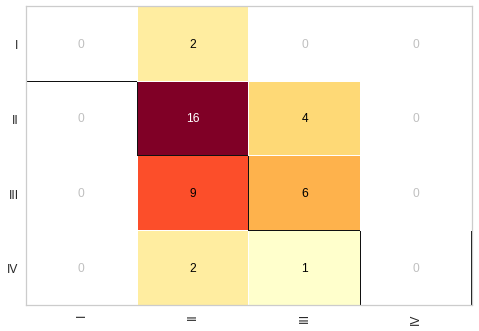

In [894]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_dados)
cm.fit(X_dados_train, y_dados_train)
cm.score(X_dados_test, y_dados_test)

In [895]:
print(classification_report(y_dados_test, previsoes))

              precision    recall  f1-score   support

           I       0.00      0.00      0.00         2
          II       0.55      0.80      0.65        20
         III       0.55      0.40      0.46        15
          IV       0.00      0.00      0.00         3

    accuracy                           0.55        40
   macro avg       0.27      0.30      0.28        40
weighted avg       0.48      0.55      0.50        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



---
# **Cenário 2:**{ Somente os Biomarcadores | Dados Não balanceados}
---

# **C2-01. KnnClassifier**{*Balanced*}0.623

((275, 6), (69, 6))

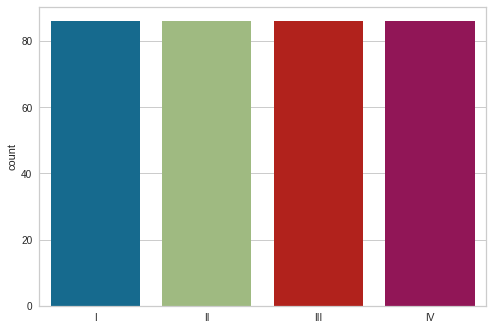

In [896]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,7:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

#label_encoder_sex = LabelEncoder()
#X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
#X_dados

# Sobreamostragem com SMOTE
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(sampling_strategy='not majority', random_state=3)
X_over, y_over = smote.fit_resample(X_dados, y_dados)

#y_over.shape, X_over.shape
np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)

import seaborn as sns
sns.countplot(x = y_over);

#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
#X_dados = onehotencorder.fit_transform(X_over).toarray()
X_dados = X_over # Se descomentar a linha de cima comentar essa.
#X_dados, X_dados.shape

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)
X_dados

#Separação dos dados BALANCEADOS
from sklearn.model_selection import train_test_split

X_dados_train_over, X_dados_test_over, y_dados_train_over, y_dados_test_over = train_test_split(X_dados, y_over, test_size=0.2, random_state=0)
X_dados_train_over.shape, X_dados_test_over.shape


In [897]:
#Knn Classifier Balanced

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [898]:
knn_modelcb = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_modelcb.fit(X_dados_train_over, y_dados_train_over)

KNeighborsClassifier()

In [899]:
previsoes = knn_modelcb.predict(X_dados_test_over)
previsoes

array(['I', 'I', 'III', 'I', 'I', 'IV', 'III', 'I', 'I', 'I', 'III', 'II',
       'IV', 'IV', 'I', 'II', 'I', 'I', 'I', 'I', 'IV', 'III', 'I', 'IV',
       'I', 'I', 'III', 'I', 'II', 'I', 'I', 'IV', 'II', 'II', 'II', 'I',
       'IV', 'IV', 'II', 'II', 'III', 'II', 'III', 'IV', 'IV', 'I', 'IV',
       'IV', 'II', 'II', 'II', 'IV', 'II', 'III', 'III', 'I', 'III',
       'III', 'I', 'I', 'II', 'IV', 'III', 'IV', 'I', 'IV', 'IV', 'III',
       'IV'], dtype=object)

In [900]:
y_dados_test_over

array(['III', 'I', 'II', 'I', 'II', 'IV', 'III', 'I', 'I', 'II', 'II',
       'I', 'III', 'IV', 'I', 'II', 'II', 'I', 'II', 'I', 'IV', 'II', 'I',
       'III', 'I', 'I', 'III', 'II', 'II', 'I', 'I', 'IV', 'II', 'II',
       'III', 'IV', 'IV', 'III', 'II', 'II', 'III', 'II', 'II', 'IV',
       'IV', 'I', 'IV', 'IV', 'III', 'I', 'II', 'II', 'III', 'III', 'III',
       'I', 'II', 'IV', 'I', 'I', 'I', 'IV', 'II', 'IV', 'I', 'IV', 'II',
       'I', 'IV'], dtype=object)

In [901]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_dados_test_over, previsoes) # padronização

0.6231884057971014

0.6231884057971014

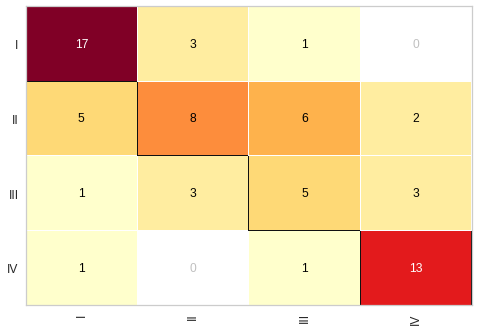

In [902]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_modelcb)
cm.fit(X_dados_train_over, y_dados_train_over)
cm.score(X_dados_test_over, y_dados_test_over)

In [903]:
print(classification_report(y_dados_test_over, previsoes))

              precision    recall  f1-score   support

           I       0.71      0.81      0.76        21
          II       0.57      0.38      0.46        21
         III       0.38      0.42      0.40        12
          IV       0.72      0.87      0.79        15

    accuracy                           0.62        69
   macro avg       0.60      0.62      0.60        69
weighted avg       0.61      0.62      0.61        69



# ***C2-02. RandomForestClassifier***{Balanced} => 0.753

((275, 6), (69, 6))

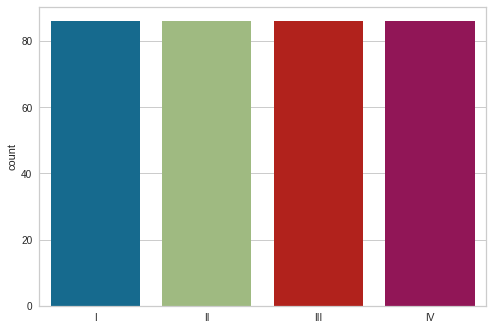

In [904]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,7:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

#label_encoder_sex = LabelEncoder()
#X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
#X_dados

# Sobreamostragem com SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=29)
#9  0.7971014492753623

X_over, y_over = smote.fit_resample(X_dados, y_dados)

#y_over.shape, X_over.shape
np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)

import seaborn as sns
sns.countplot(x = y_over);

#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
#X_dados = onehotencorder.fit_transform(X_over).toarray()
X_dados = X_over
#X_dados, X_dados.shape

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)
X_dados

#Separação dos dados BALANCEADOS
from sklearn.model_selection import train_test_split

X_dados_train_over, X_dados_test_over, y_dados_train_over, y_dados_test_over = train_test_split(X_dados, y_over, test_size=0.2, random_state=0)
X_dados_train_over.shape, X_dados_test_over.shape


In [905]:
from sklearn.ensemble import RandomForestClassifier #1,6,300,10 -->0.681 | 1,5,200, 17 -->0.8115942028985508

random_forest_dados = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 200, random_state = 17 )
random_forest_dados.fit(X_dados_train_over, y_dados_train_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200, random_state=17)

In [906]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_dados.predict(X_dados_test_over)
accuracy_score(y_dados_test_over, previsoes)

0.7536231884057971

0.7536231884057971

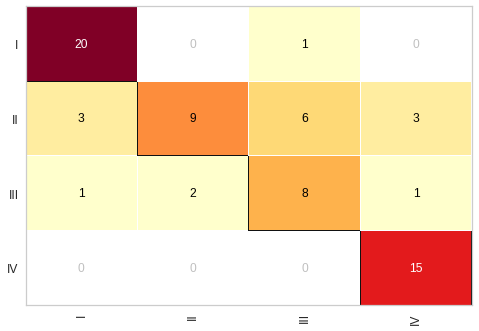

In [907]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_dados)
cm.fit(X_dados_train_over, y_dados_train_over)
cm.score(X_dados_test_over, y_dados_test_over)

In [908]:
print(classification_report(y_dados_test_over, previsoes))

              precision    recall  f1-score   support

           I       0.83      0.95      0.89        21
          II       0.82      0.43      0.56        21
         III       0.53      0.67      0.59        12
          IV       0.79      1.00      0.88        15

    accuracy                           0.75        69
   macro avg       0.74      0.76      0.73        69
weighted avg       0.77      0.75      0.74        69



# **C2-03. SVM**{Balanced} => 0.521, linear, 0, 10 |

((array(['I', 'II', 'III', 'IV'], dtype=object), array([16, 86, 76, 21])),
 (array(['I', 'II', 'III', 'IV'], dtype=object), array([86, 86, 86, 86])))

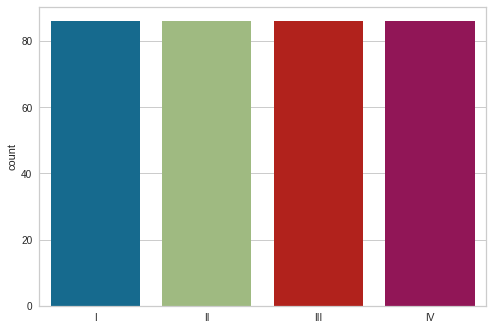

In [909]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd


# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,7:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

#label_encoder_sex = LabelEncoder()
#X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
#X_dados

# Sobreamostragem com SMOTE

from imblearn.over_sampling import SMOTE
import numpy as np

lista = []
count = 1

smote = SMOTE(sampling_strategy='not majority', random_state=16)
#2 - 47
X_over, y_over = smote.fit_resample(X_dados, y_dados)

#y_over.shape, X_over.shape

np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)

import seaborn as sns
sns.countplot(x = y_over);

#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
#X_dados = onehotencorder.fit_transform(X_over).toarray()
X_dados = X_over
#X_dados, X_dados.shape

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)
X_dados

#Separação dos dados BALANCEADOS
from sklearn.model_selection import train_test_split

X_dados_train_over, X_dados_test_over, y_dados_train_over, y_dados_test_over = train_test_split(X_dados, y_over, test_size=0.2, random_state=1)
X_dados_train_over.shape, X_dados_test_over.shape
np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)


In [910]:
from sklearn.svm import SVC

In [911]:
svm_dados = SVC(kernel='linear', random_state=0, C = 10.0) # 2 -> 4
svm_dados.fit(X_dados_train_over, y_dados_train_over)

SVC(C=10.0, kernel='linear', random_state=0)

In [912]:
previsoes = svm_dados.predict(X_dados_test_over)
previsoes

array(['IV', 'IV', 'IV', 'IV', 'IV', 'I', 'I', 'I', 'IV', 'I', 'I', 'IV',
       'IV', 'I', 'III', 'II', 'III', 'IV', 'II', 'II', 'I', 'I', 'IV',
       'IV', 'I', 'I', 'IV', 'I', 'IV', 'IV', 'I', 'IV', 'I', 'I', 'IV',
       'IV', 'III', 'IV', 'IV', 'I', 'I', 'IV', 'I', 'I', 'IV', 'III',
       'III', 'IV', 'IV', 'III', 'IV', 'IV', 'I', 'II', 'IV', 'I', 'II',
       'IV', 'II', 'I', 'I', 'I', 'IV', 'IV', 'IV', 'I', 'II', 'I', 'II'],
      dtype=object)

In [913]:
y_dados_test_over

array(['IV', 'IV', 'IV', 'III', 'IV', 'I', 'III', 'I', 'III', 'I', 'III',
       'I', 'IV', 'III', 'II', 'II', 'I', 'I', 'II', 'II', 'I', 'I', 'IV',
       'IV', 'II', 'I', 'I', 'III', 'IV', 'II', 'III', 'III', 'I', 'III',
       'III', 'III', 'III', 'II', 'IV', 'II', 'II', 'III', 'III', 'I',
       'IV', 'I', 'III', 'IV', 'IV', 'III', 'III', 'IV', 'III', 'III',
       'IV', 'I', 'IV', 'II', 'II', 'I', 'III', 'II', 'IV', 'IV', 'II',
       'II', 'II', 'I', 'II'], dtype=object)

In [914]:
from sklearn.metrics import accuracy_score, classification_report 
#0.475, liner, 1, 1 | 0.425, poly, 1, 1 | #0.475, sigmoid, 1, 1 | 0.425, rbf, 1, 1
#0.434, rbf 1, 2 |0.521 linear, 0, 10

accuracy_score(y_dados_test_over, previsoes)

0.5217391304347826

0.5217391304347826

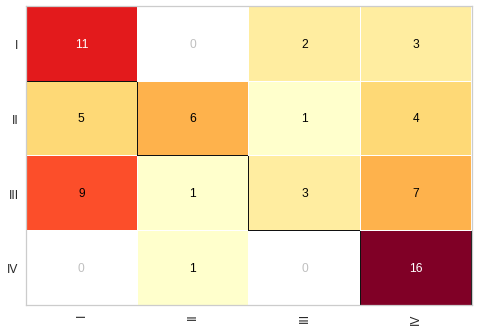

In [915]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_dados)
cm.fit(X_dados_train_over, y_dados_train_over)
cm.score(X_dados_test_over, y_dados_test_over)

In [916]:
print(classification_report(y_dados_test_over, previsoes))

              precision    recall  f1-score   support

           I       0.44      0.69      0.54        16
          II       0.75      0.38      0.50        16
         III       0.50      0.15      0.23        20
          IV       0.53      0.94      0.68        17

    accuracy                           0.52        69
   macro avg       0.56      0.54      0.49        69
weighted avg       0.55      0.52      0.48        69



# **C2-04. Agrupamento Hierarquico**

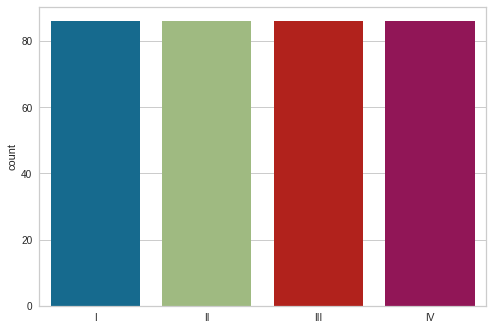

In [917]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	

X_dados = dados.iloc[:,7:13].values

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

# label_encoder_sex = LabelEncoder()
# X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])

# Sobreamostragem com SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority')
X_over, y_over = smote.fit_resample(X_dados, y_dados)

#y_over.shape, X_over.shape
np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)

import seaborn as sns
sns.countplot(x = y_over);

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
# X_dados = onehotencorder.fit_transform(X_over).toarray()

#X_dados, X_dados.shape

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_over)
X_dados

#Separação dos dados BALANCEADOS
from sklearn.model_selection import train_test_split
X_dados_train_over, X_dados_test_over, y_dados_train_over, y_dados_test_over = train_test_split(X_dados, y_over, test_size=0.2, random_state=0)


In [918]:
#Reduzir as dimensões de dimensões.
from sklearn.decomposition import PCA
import plotly.express as px


In [919]:
pca = PCA(n_components=None)

In [920]:
X_dados_train_pca = pca.fit_transform(X_dados_train_over)
X_dados_test_pca = pca.transform(X_dados_test_over)

In [921]:
X_dados_train_pca.shape, X_dados_test_pca.shape,

((275, 6), (69, 6))

In [922]:
#X_dados_train_pca

In [923]:
pca.explained_variance_ratio_

array([0.387205  , 0.19881581, 0.15278248, 0.1247348 , 0.08790754,
       0.04855437])

In [924]:
pca.explained_variance_ratio_.sum()

1.0

In [925]:
grafico = px.scatter(x = X_dados_train_pca[:,0], y= X_dados_train_pca[:,1]) 
grafico.show()

In [926]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

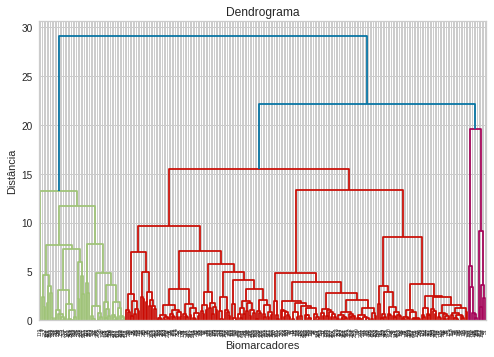

In [927]:
dendrograma = dendrogram(linkage(X_dados_train_pca, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Biomarcadores')
plt.ylabel('Distância');

In [928]:
from sklearn.cluster import AgglomerativeClustering

In [929]:
hc_dados_agrup = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
rotulos = hc_dados_agrup.fit_predict(X_dados_train_pca)
rotulos

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [930]:
y_dados_train

array(['III', 'II', 'III', 'II', 'II', 'I', 'III', 'II', 'III', 'III',
       'III', 'III', 'II', 'III', 'III', 'II', 'III', 'III', 'II', 'III',
       'III', 'IV', 'II', 'IV', 'I', 'II', 'III', 'IV', 'II', 'II', 'II',
       'III', 'II', 'III', 'II', 'II', 'I', 'III', 'I', 'II', 'IV', 'III',
       'II', 'II', 'I', 'II', 'II', 'II', 'III', 'IV', 'II', 'III', 'IV',
       'III', 'I', 'III', 'III', 'II', 'II', 'II', 'II', 'II', 'II', 'II',
       'II', 'II', 'II', 'III', 'II', 'III', 'II', 'II', 'II', 'III',
       'III', 'II', 'III', 'II', 'IV', 'II', 'IV', 'II', 'III', 'IV',
       'IV', 'III', 'III', 'II', 'III', 'II', 'II', 'III', 'IV', 'III',
       'II', 'IV', 'I', 'III', 'I', 'II', 'II', 'III', 'II', 'II', 'II',
       'II', 'III', 'III', 'II', 'I', 'III', 'III', 'II', 'III', 'IV',
       'II', 'III', 'III', 'II', 'II', 'I', 'II', 'IV', 'III', 'III',
       'III', 'I', 'II', 'I', 'IV', 'III', 'III', 'II', 'III', 'III',
       'III', 'III', 'III', 'II', 'II', 'III', 'II', 'II', 'I

In [931]:
grafico = px.scatter(x = X_dados_train_pca[:,0], y = X_dados_train_pca[:,1], color = rotulos)
grafico.show()